# Libs

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Data Understanding

In [2]:
df= pd.read_csv('data/Dataset1.csv')

In [3]:
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [4]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


# Data Prep

In [7]:
#null values
# df= df.fillna(df.mean())
df = df.fillna(0)

In [8]:
df.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [9]:
#drop the id coz unnecessasry
df= df.drop(['id'], axis=1)

In [10]:
#int to float
df= df.astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  float64
 1   is_movie_package_subscriber  72274 non-null  float64
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  float64
 4   reamining_contract           72274 non-null  float64
 5   service_failure_count        72274 non-null  float64
 6   download_avg                 72274 non-null  float64
 7   upload_avg                   72274 non-null  float64
 8   download_over_limit          72274 non-null  float64
 9   churn                        72274 non-null  float64
dtypes: float64(10)
memory usage: 5.5 MB


In [12]:
#new df with clean outliers
df1= df
df1

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1.0,0.0,11.95,25.0,0.14,0.0,8.4,2.3,0.0,0.0
1,0.0,0.0,8.22,0.0,0.00,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,8.91,16.0,0.00,0.0,13.7,0.9,0.0,1.0
3,0.0,0.0,6.87,21.0,0.00,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,6.39,0.0,0.00,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
72269,1.0,1.0,0.09,0.0,1.25,0.0,0.0,0.0,0.0,1.0
72270,1.0,0.0,0.06,1.0,1.63,0.0,0.8,0.0,0.0,1.0
72271,1.0,0.0,0.02,0.0,2.19,0.0,1.5,0.2,0.0,1.0
72272,0.0,0.0,0.01,0.0,0.72,0.0,0.0,0.0,0.0,1.0


# Data Model

In [13]:
#target feature encoding
# le = LabelEncoder()
# df1['churn'] = le.fit_transform(df1['churn'])

le = LabelEncoder()
df1['churn'] = le.fit_transform(df1['churn'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {0.0: 0, 1.0: 1}


## SVM

In [14]:
X = df1.drop('churn', axis=1)
y = df1['churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# svm_model = SVC(kernel='linear', probability=True)
# svm_model.fit(X_train, y_train)

# svm_model = LinearSVC(random_state=42)
# svm_model.fit(X_train, y_train)

# base_svc = LinearSVC(random_state=42)
# svm_model = CalibratedClassifierCV(base_svc, cv=5)  
# svm_model.fit(X_train, y_train)

param_grid = {'estimator__C': [0.01, 0.1, 1, 10, 100]}

# Initialize LinearSVC with CalibratedClassifierCV for probability estimates
base_svc = LinearSVC(random_state=42)
svm_model = CalibratedClassifierCV(base_svc, cv=5)

# Perform GridSearchCV on the calibrated model
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_svm_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)



Best Parameters: {'estimator__C': 0.01}
Best Cross-Validation Score: 0.8688501885870066


In [18]:
# y_pred_svm = svm_model.predict(X_test)
# y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]

y_pred_svm = best_svm_model.predict(X_test)
y_pred_svm_proba = best_svm_model.predict_proba(X_test)[:, 1]

In [19]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_svm_proba)

In [20]:
tn, fp, fn, tp = conf_matrix_svm.ravel()
sensitivity_svm = tp / (tp + fn)
specificity_svm = tn / (tn + fp)
f1_score_svm = 2 * (sensitivity_svm * specificity_svm) / (sensitivity_svm + specificity_svm)

In [21]:
print("SVM Model Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Sensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)
print("F1 Score:", f1_score_svm)
print("AUC:", auc_svm)

SVM Model Accuracy: 0.8685606235299543
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      9795
           1       0.85      0.92      0.88     11888

    accuracy                           0.87     21683
   macro avg       0.87      0.86      0.87     21683
weighted avg       0.87      0.87      0.87     21683

Confusion Matrix:
 [[ 7891  1904]
 [  946 10942]]
Sensitivity: 0.9204239569313594
Specificity: 0.8056151097498724
F1 Score: 0.8592012329192684
AUC: 0.9357430067047421


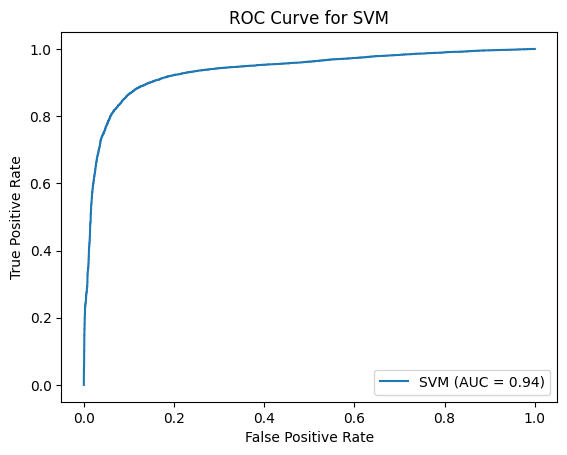

In [22]:
plt.figure()
plt.plot(fpr, tpr, label="SVM (AUC = {:.2f})".format(auc_svm))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend(loc="lower right")
plt.show()

## CNN

In [23]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [84]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# cnn_model = Sequential()
# cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# cnn_model.add(Dropout(0.5))
# cnn_model.add(Conv1D(16, kernel_size=3, activation='relu'))
# cnn_model.add(Flatten())
# cnn_model.add(Dense(1, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
cnn_model.fit(X_train_cnn, y_train, epochs=70, batch_size=16, validation_data=(X_test_cnn, y_test))
# cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.8829 - loss: 0.3197 - val_accuracy: 0.9194 - val_loss: 0.2385
Epoch 2/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9186 - loss: 0.2477 - val_accuracy: 0.9239 - val_loss: 0.2344
Epoch 3/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9215 - loss: 0.2417 - val_accuracy: 0.9290 - val_loss: 0.2226
Epoch 4/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - accuracy: 0.9264 - loss: 0.2299 - val_accuracy: 0.9287 - val_loss: 0.2208
Epoch 5/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.9298 - loss: 0.2235 - val_accuracy: 0.9275 - val_loss: 0.2215
Epoch 6/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.9276 - loss: 0.2265 - val_accuracy: 0.9271 - val_loss: 0.2249
Epoch 7/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9287 - loss: 0.2260 - val_accuracy: 0.9316 - val_loss: 0.2148
Epoch 8/70
3162/3162 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - accuracy: 0.9296 - l

In [87]:
y_pred_cnn_proba = cnn_model.predict(X_test_cnn).ravel()
y_pred_cnn = (y_pred_cnn_proba > 0.5).astype(int)

678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [88]:
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
classification_report_cnn = classification_report(y_test, y_pred_cnn)
auc_cnn = roc_auc_score(y_test, y_pred_cnn_proba)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_cnn_proba)

In [89]:
tn, fp, fn, tp = conf_matrix_cnn.ravel()
sensitivity_cnn = tp / (tp + fn)
specificity_cnn = tn / (tn + fp)
f1_score_cnn = 2 * (sensitivity_cnn * specificity_cnn) / (sensitivity_cnn + specificity_cnn)

In [90]:
print("CNN Model Accuracy:", accuracy_cnn)
print("Classification Report:\n", classification_report_cnn)
print("Confusion Matrix:\n", conf_matrix_cnn)
print("Sensitivity:", sensitivity_cnn)
print("Specificity:", specificity_cnn)
print("F1 Score:", f1_score_cnn)
print("AUC:", auc_cnn)

CNN Model Accuracy: 0.936632384817599
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      9795
           1       0.95      0.93      0.94     11888

    accuracy                           0.94     21683
   macro avg       0.94      0.94      0.94     21683
weighted avg       0.94      0.94      0.94     21683

Confusion Matrix:
 [[ 9197   598]
 [  776 11112]]
Sensitivity: 0.9347240915208613
Specificity: 0.9389484430832057
F1 Score: 0.9368315052249382
AUC: 0.9726288347530844


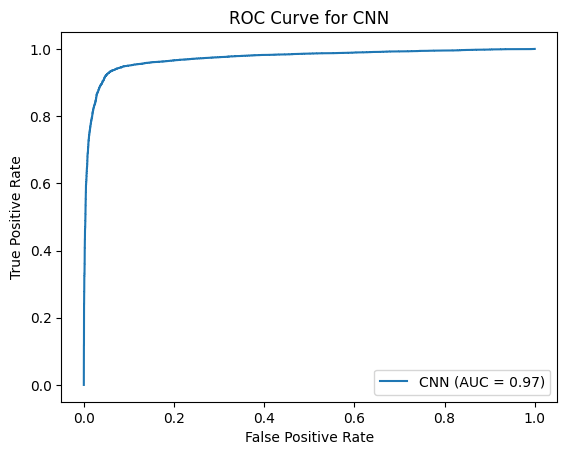

In [91]:
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, label="CNN (AUC = {:.2f})".format(auc_cnn))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CNN")
plt.legend(loc="lower right")
plt.show()